### Input networks from different data sources

In [1]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, pickle, subprocess
from networks import bio_networks, utils
from create_datasets import create_nx_datasets, create_splits

**1. Obtain genes of interest**

Using DisGeNET to get Gene-Disease-Associations (GDAs) to Alzheimer's Disease (AD gene set) and other neurodegenerative diseases (ND).

In [ ]:
subprocess.call ("genes_of_interest/get_GDAs.R")

**2. Obtain biological networks**

Obtain new biological networks for the AD gene set from different sources:
1. STRING: Protein-Protein Interactions (PPIs)
2. BioGRID: Protein-Protein Interactions (PPIs)
3. Human Reference Interactome (HuRI): PPIs
4. PPT-Ohmnet dataset from Stanford Network Analysis Project (SNAP): brain-specific PPIs
5. GIANT: functional network, brain-specific

In [4]:
# STRING (PPI)
print('STRING')
edgelist_string = bio_networks.get_string('data/AD_GDAs.tsv')
print()

# BioGRID (PPI)
print('BioGRID')
edgelist_biogrid = bio_networks.get_biogrid('data/AD_GDAs.txt')
print()

# HuRI (PPI) - HuRI interactions were downloaded from HuRI webpage and then parsed to obtain the corresponding edgelist.
print('HuRI')
edgelist_huri = bio_networks.get_huri('data/other_networks/HuRI_download_interactions_dec_16_2021_11_54_03.csv')
print()

# PPT-Ohmnet (PPI, brain-specific)
print('PPT-Ohmnet')
network_snap = bio_networks.get_snap('data/AD_GDAs.txt')
print()

# GIANT (functional network, brain-specific)
print('GIANT')
network_giant = bio_networks.get_giant('data/AD_GDAs.txt')
print()

STRING
Unique genes from DisGeNET: 101
Whole network: 59 nodes
Biggest connected component: 52 nodes
Percentage of lost genes/nodes: 7 (11.86%)

BioGRID
Whole network: 46 nodes
Biggest connected component: 38 nodes
Percentage of lost genes/nodes: 8 (17.39%)

HuRI
Whole network: 18 nodes
Biggest connected component: 12 nodes
Percentage of lost genes/nodes: 6 (33.33%)

PPT-Ohmnet
querying 1-102...done.
Finished.
{1636: 'ACE', 351: 'APP', 102: 'ADAM10', 2932: 'GSK3B', 3077: 'HFE', 348: 'APOE', 4137: 'MAPT', 54209: 'TREM2', 5663: 'PSEN1', 5328: 'PLAU', 23621: 'BACE1', 3416: 'IDE', 3553: 'IL1B', 3643: 'INSR', 3952: 'LEP', 4852: 'NPY', 596: 'BCL2', 627: 'BDNF', 836: 'CASP3', 3481: 'IGF2', 3480: 'IGF1R', 498: 'ATP5F1A', 3630: 'INS', 581: 'BAX', 10347: 'ABCA7', 10452: 'TOMM40', 1191: 'CLU', 1378: 'CR1', 2: 'A2M', 2041: 'EPHA1', 23607: 'CD2AP', 274: 'BIN1', 341: 'APOC1', 4353: 'MPO', 4846: 'NOS3', 5664: 'PSEN2', 6653: 'SORL1', 8301: 'PICALM', 7447: 'VSNL1', 3635: 'INPP5D', 5819: 'NECTIN2', 5133

**2. Create graph datasets**

Create the correspoding graph-datasets for each newly obtained biological network.

In [3]:
dataset = 'ADNI'
targets = ['PET', 'PETandDX']
networks = ['string', 'biogrid', 'huri', 'snap_brain', 'giant_brain']

for target in targets:
    for network in networks:

        outdir = f'data/graph_datasets/{target}'

        result_nodes = create_nx_datasets.main('data', dataset, target, 'AD', network, 'missense', None)
#         outfile = f'{outdir}/AD_PPI_{network}_missense.pkl'
#         print('Resulting dataset saved at:', outfile)
        print()

#         with open(outfile, 'wb') as f:
#             pickle.dump(result_nodes, f)

data/AD_STRING_PPI_edgelist.txt
Network used: AD string
# nodes = 59
# edges = 115

Dataset used: ADNI
missense
(59, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 52 # edges = 111
Density = 0.083710407239819 Diameter = 6

Network used: AD biogrid
# nodes = 46
# edges = 62

Dataset used: ADNI
missense
(46, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 38 # edges = 57
Density = 0.08108108108108109 Diameter = 5

Network used: AD huri
# nodes = 18
# edges = 16

Dataset used: ADNI
missense
(18, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 12 # edges = 13
Density = 0.19696969696969696 Diameter = 6

Network used: AD snap_brain
# nodes = 29
# edges = 52

Dataset used: ADNI
missense
(29, 808)
Creating samples graphs...
Class: PET. Found 410 positive subjects out of 726
Sample graph used: # nodes = 2

KeyboardInterrupt: 

In [ ]:
# Create splits for using it in GraphGym and non-GNN models
# Splits are obtained through 10-Fold Stratied Cross Validation

create_splits.create_folds_stratified_cv('PET', 10)
create_splits.create_folds_stratified_cv('PETandDX', 10)

**3. Graph classification with GNNs**

We then evaluated and tested different GNNs in the framework called [GraphGym](https://github.com/snap-stanford/GraphGym) (You *et al.*, 2020).

Configuration and grid files employed are in the subdirectory [graphgym_files](graphgym_files).

Summarized results obtained by GraphGym and other models are in **COMPLETE**

This section evaluates significance between the results that obtained different best GNN configs for each biological network.

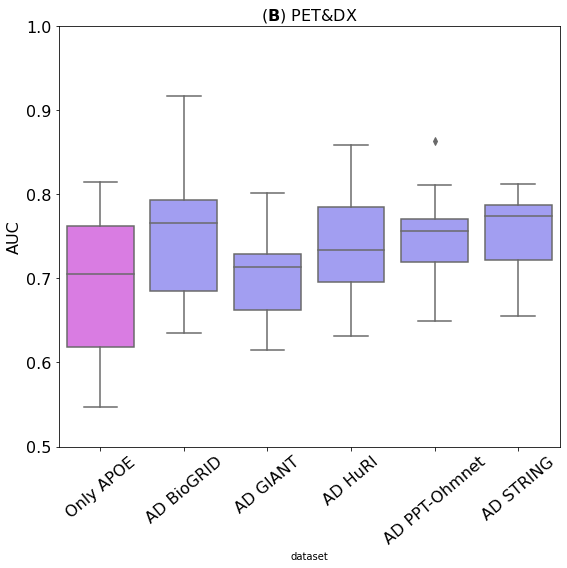

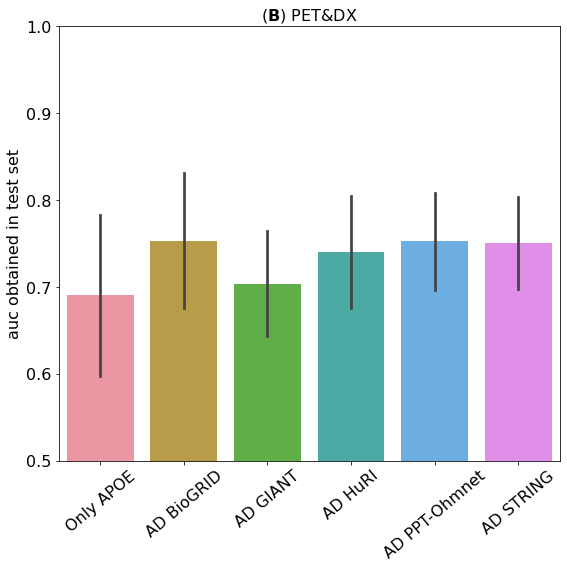

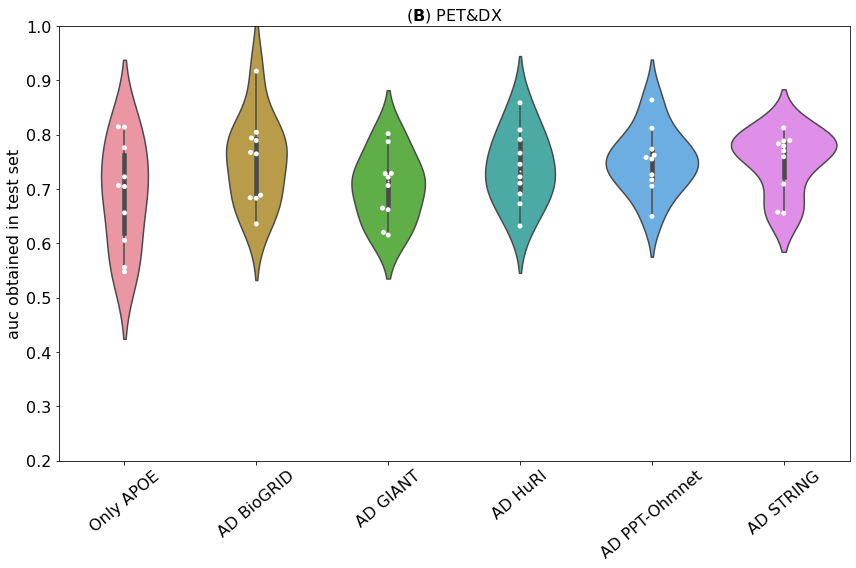

In [9]:
petdx_results = pd.read_csv('results/2022_03_networks_PETandDX.csv')
utils.boxplot_comparision_others('PETandDX', petdx_results, 'auc', r"($\bf{B}$) PET&DX")
utils.barplot_comparision_others('PETandDX', petdx_results, 'auc', r"($\bf{B}$) PET&DX")
utils.violinplot_comparision_others('PETandDX', petdx_results, 'auc', r"($\bf{B}$) PET&DX")

In [4]:
pvalues = utils.statistics(petdx_results)
print(pvalues)

{'AD PPT-Ohmnet': 0.051717255609973756, 'AD STRING': 0.05469058028620656, 'AD BioGRID': 0.06926328684824597, 'AD HuRI': 0.10254157203420601, 'AD GIANT': 0.3604574252913516, 'Only APOE': 0.5}


In [17]:
df = petdx_results.drop(columns =['fold', 'acc', 'pre', 'rec', 'f1'])
df['auc_mean'] = df.groupby(['dataset', 'model', 'target'])['auc'].transform('mean')
df['auc_std'] = df.groupby(['dataset', 'model'])['auc'].transform('std')
df

,target,dataset,model,auc,auc_mean,auc_std
0,PETandDX,Only APOE,Logistic Regression,0.706478,0.690087,0.097874
1,PETandDX,Only APOE,Logistic Regression,0.605263,0.690087,0.097874
2,PETandDX,Only APOE,Logistic Regression,0.704365,0.690087,0.097874
3,PETandDX,Only APOE,Logistic Regression,0.722222,0.690087,0.097874
4,PETandDX,Only APOE,Logistic Regression,0.775794,0.690087,0.097874
5,PETandDX,Only APOE,Logistic Regression,0.547619,0.690087,0.097874
6,PETandDX,Only APOE,Logistic Regression,0.813492,0.690087,0.097874
7,PETandDX,Only APOE,Logistic Regression,0.814103,0.690087,0.097874
8,PETandDX,Only APOE,Logistic Regression,0.655983,0.690087,0.097874
9,PETandDX,Only APOE,Logistic Regression,0.555556,0.690087,0.097874


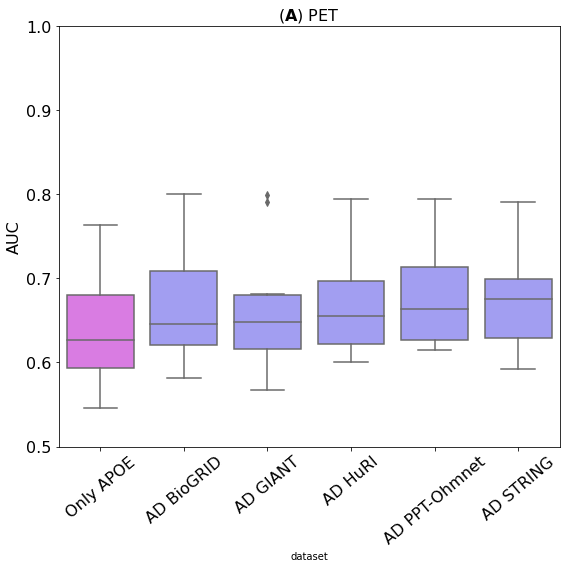

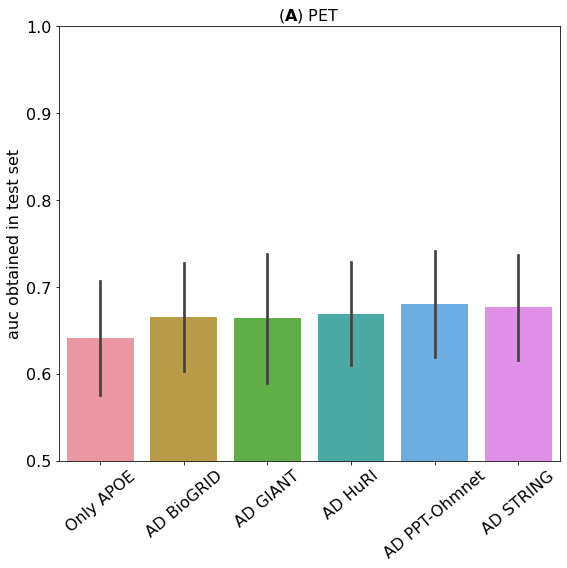

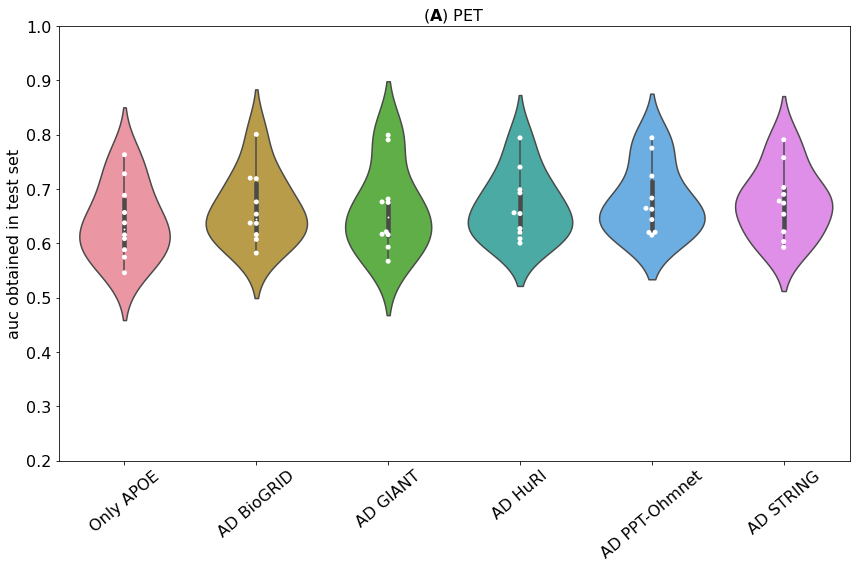

In [5]:
pet_results = pd.read_csv('results/2022_03_networks_PET.csv')
utils.boxplot_comparision_others('PET', pet_results, 'auc', r"($\bf{A}$) PET")
utils.barplot_comparision_others('PET', pet_results, 'auc', r"($\bf{A}$) PET")
utils.violinplot_comparision_others('PET', pet_results, 'auc', r"($\bf{A}$) PET")

In [6]:
pvalues = utils.statistics(pet_results)
print(pvalues)

{'AD PPT-Ohmnet': 0.10071607071645536, 'AD STRING': 0.12241840380211852, 'AD HuRI': 0.17181326452204604, 'AD BioGRID': 0.21595301121112814, 'AD GIANT': 0.2485419526815798, 'Only APOE': 0.5}


In [7]:
pet_results['auc_mean'] = pet_results.groupby(['dataset', 'model', 'target'])['auc'].transform('mean')
pet_results['auc_std'] = pet_results.groupby(['dataset', 'model'])['auc'].transform('std')
pet_results

,fold,target,dataset,model,acc,pre,rec,f1,auc,Unnamed: 9,auc_mean,auc_std
0,1,PET,Only APOE,Logistic Regression,0.657534,0.625000,0.975610,0.761905,0.727896,"[[8, 24], [1, 40]]",0.640551,0.069063
1,2,PET,Only APOE,Logistic Regression,0.575342,0.583333,0.853659,0.693069,0.637576,"[[7, 25], [6, 35]]",0.640551,0.069063
2,3,PET,Only APOE,Logistic Regression,0.561644,0.636364,0.512195,0.567568,0.545732,"[[20, 12], [20, 21]]",0.640551,0.069063
3,4,PET,Only APOE,Logistic Regression,0.547945,0.562500,0.878049,0.685714,0.688262,"[[4, 28], [5, 36]]",0.640551,0.069063
4,5,PET,Only APOE,Logistic Regression,0.616438,0.600000,0.951220,0.735849,0.762957,"[[6, 26], [2, 39]]",0.640551,0.069063
5,6,PET,Only APOE,Logistic Regression,0.616438,0.724138,0.512195,0.600000,0.615473,"[[24, 8], [20, 21]]",0.640551,0.069063
6,7,PET,Only APOE,Logistic Regression,0.597222,0.588235,0.975610,0.733945,0.588120,"[[3, 28], [1, 40]]",0.640551,0.069063
7,8,PET,Only APOE,Logistic Regression,0.666667,0.774194,0.585366,0.666667,0.656570,"[[24, 7], [17, 24]]",0.640551,0.069063
8,9,PET,Only APOE,Logistic Regression,0.569444,0.666667,0.487805,0.563380,0.574351,"[[21, 10], [21, 20]]",0.640551,0.069063
9,10,PET,Only APOE,Logistic Regression,0.583333,0.584615,0.926829,0.716981,0.608576,"[[4, 27], [3, 38]]",0.640551,0.069063
